In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df["job_skills"]=df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Hassaan Yousaf\anaconda3\envs\pythonproj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_us=df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg'])

In [ ]:
job_titles=df_us['job_title_short'].value_counts().index[:5].tolist()

In [5]:
df_top5=df_us[df_us['job_title_short'].isin(job_titles)]

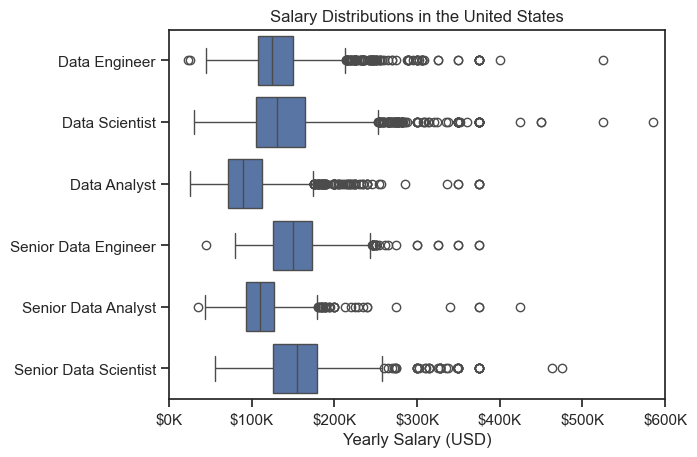

In [8]:
sns.boxplot(data=df_top5, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

In [9]:
df_da_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]
df_da_us=df_da_us=df_da_us.dropna(subset='salary_year_avg')

In [11]:
df_exploded=df_da_us.explode('job_skills')
df_da_us[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,"[python, r, alteryx, tableau]"
180,90250.0,"[excel, powerpoint]"
410,133285.0,"[sql, word, excel, visio, powerpoint, sharepoint]"
988,62623.0,"[sql, excel, tableau]"
1413,71300.0,"[sql, excel, power bi]"


In [16]:
df_top_pay=df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_top_pay=df_top_pay.head(10)

In [19]:
df_top_skill=df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_top_skill=df_top_skill.head(10)
df_top_pay.sort_values(by='median', ascending=False)

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


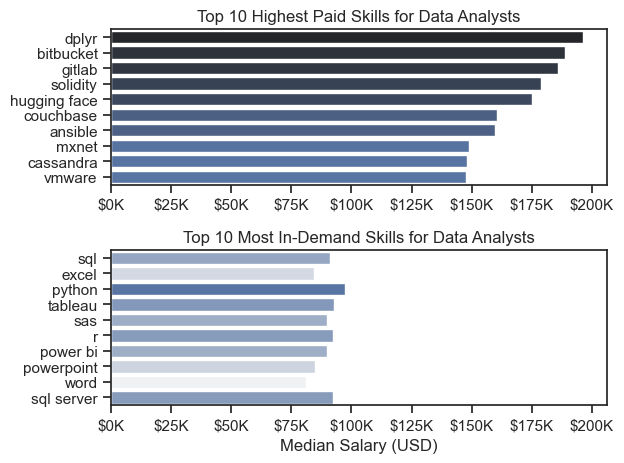

In [20]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_top_skill, x='median', y=df_top_skill.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_top_skill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()